# Data exploration and decision modeling with decision tree

## Loading weather data for golf play

In [1]:
import pandas as pd

df = pd.read_csv('./data/golf.csv')

display(df)

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## Identifying column types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [3]:
# If the data requires to be numerical

# '''
df['Outlook'] = pd.Categorical(df['Outlook']).codes

# similarly, convet the all categorical data to numeric data
df['Temperature'] = pd.Categorical(df['Temperature']).codes
df['Humidity'] = pd.Categorical(df['Humidity']).codes
df['Windy'] = pd.Categorical(df['Windy']).codes
df['Play'] = pd.Categorical(df['Play']).codes


df
#'''

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      14 non-null     int8 
 1   Temperature  14 non-null     int8 
 2   Humidity     14 non-null     int8 
 3   Windy        14 non-null     int8 
 4   Play         14 non-null     int8 
dtypes: int8(5)
memory usage: 198.0 bytes


## Correlation of the variables

In [5]:
df.corr()

,Outlook,Temperature,Humidity,Windy,Play
Outlook,1.000000,0.092036,-8.944272e-02,-7.745967e-02,-0.493333
Temperature,0.092036,1.000000,-5.144958e-01,2.475369e-02,-0.051131
Humidity,-0.089443,-0.514496,1.000000e+00,1.602469e-17,0.447214
Windy,-0.077460,0.024754,1.602469e-17,1.000000e+00,-0.258199
Play,-0.493333,-0.051131,4.472136e-01,-2.581989e-01,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

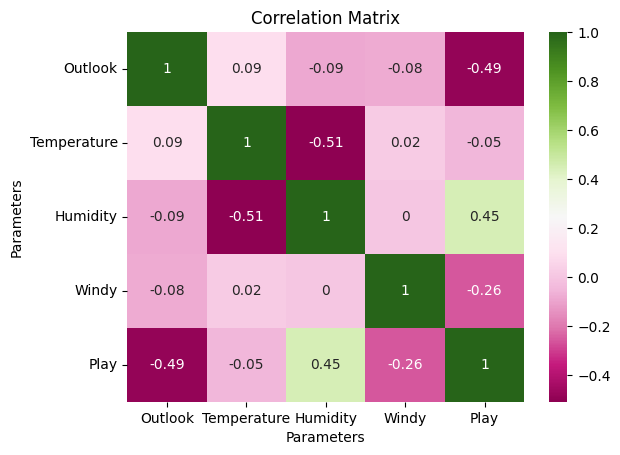

In [6]:
# Visualizing the correlation with seaborn

import seaborn as sns
import matplotlib.pyplot as plt

classes = list(df)
xticklabels = classes
yticklabels = classes

ax= plt.subplot()

# annot=True to annotate cells, 
# ftm='g' to disable scientific notation
sns.heatmap(df.corr().round(2), 
            annot=True, fmt='g', ax=ax, 
            xticklabels=xticklabels, 
            yticklabels=yticklabels,
           cmap="PiYG");  

# labels, title and ticks
ax.set_xlabel('Parameters')
ax.set_ylabel('Parameters')
ax.set_title('Correlation Matrix')

## Readying data frame for machine learning

In [7]:
y = df['Play'].to_numpy()

df=df.drop(columns=['Play'])

X = df.to_numpy()

print(X[:5])
print(y[:5])

[[2 1 0 0]
 [2 1 0 1]
 [0 1 0 0]
 [1 2 0 0]
 [1 0 1 0]]
[0 0 1 1 1]


## Building a decision tree

[Text(0.375, 0.875, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.375, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.375, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

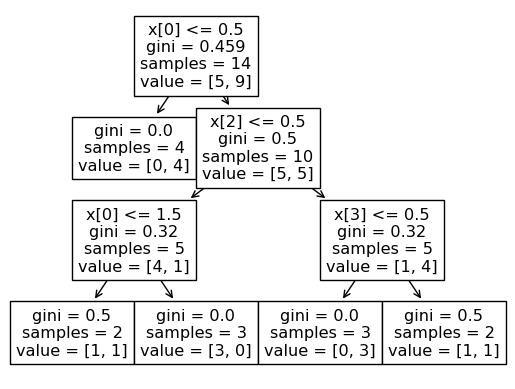

In [8]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
clf = clf.fit(X, y)

tree.plot_tree(clf)

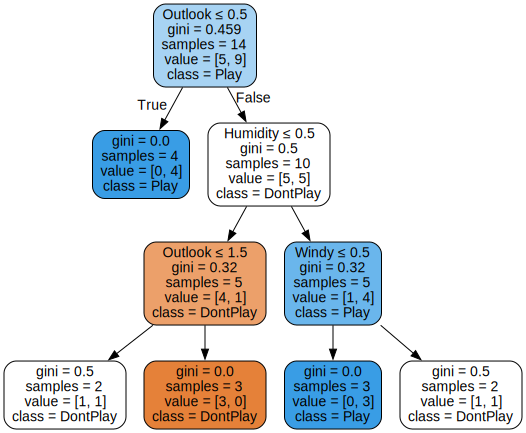

In [9]:
# Visualizing the decision-tree with proper labels
import graphviz

feature_names = list(df)
class_names= ['DontPlay', 'Play']
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,
                                class_names=class_names,
                                filled=True, 
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [10]:
# saving the graph
graph.render("golf-decision-tree", format="png")

'golf-decision-tree.png'